In [ ]:
# import!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Data-set
Collaborators: UCI Machine Learning (Owner)<br>
License: CC BY-NC-SA 4.0<br>
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download<br>
"Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image."<br>


In [138]:
#cols = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
#df = pd.read_csv("data.csv", names=cols)
df = pd.read_csv("data.csv")
df.dropna(axis='columns', inplace=True)
print(df.info)
df.head()

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [139]:
df["diagnosis"] = (df["diagnosis"] == "M").astype(int)

In [53]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


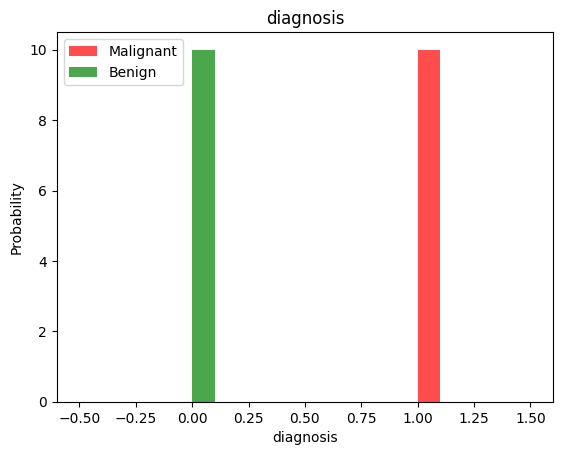

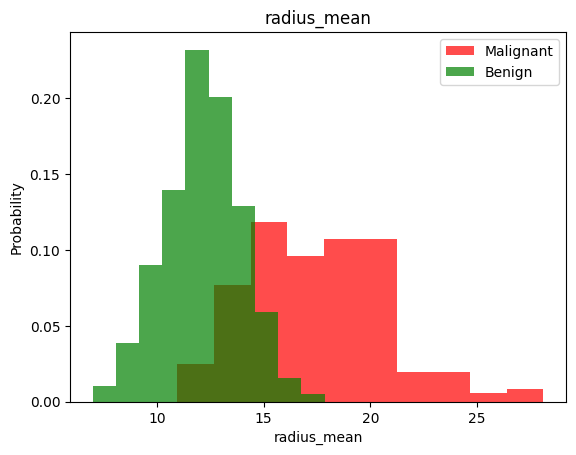

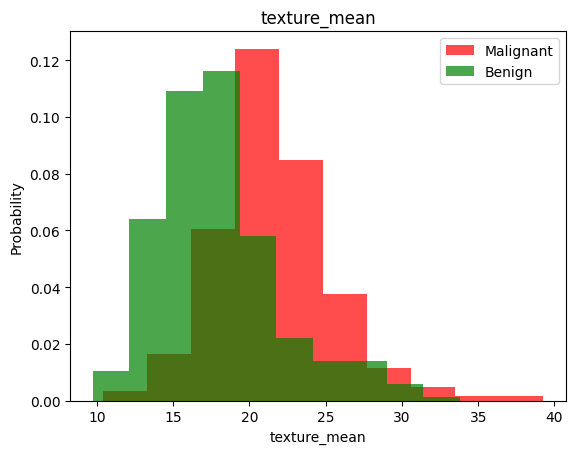

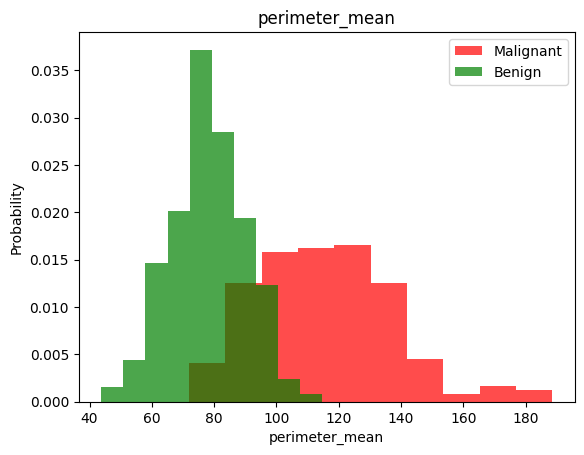

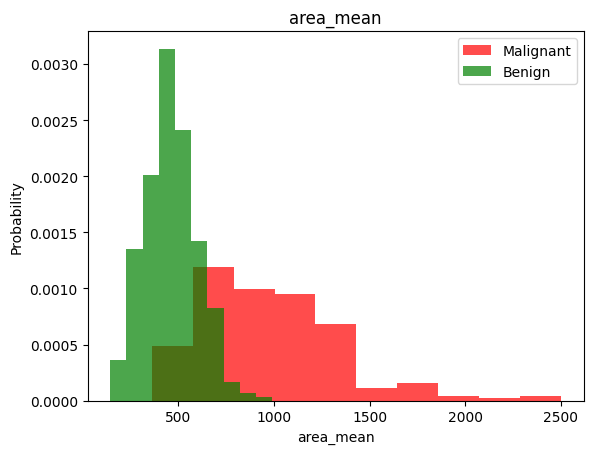

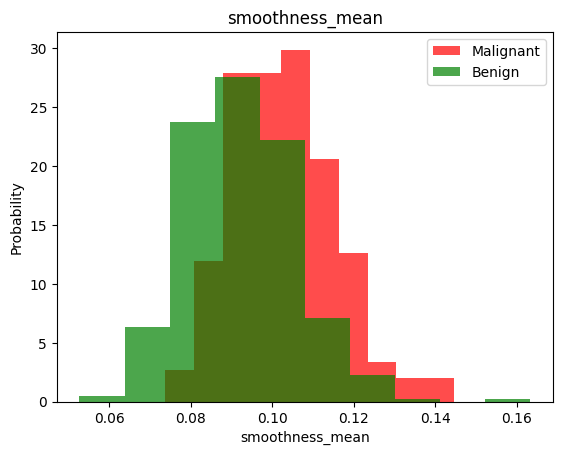

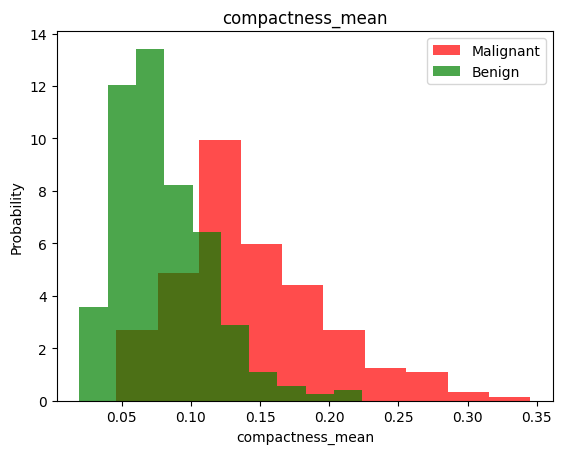

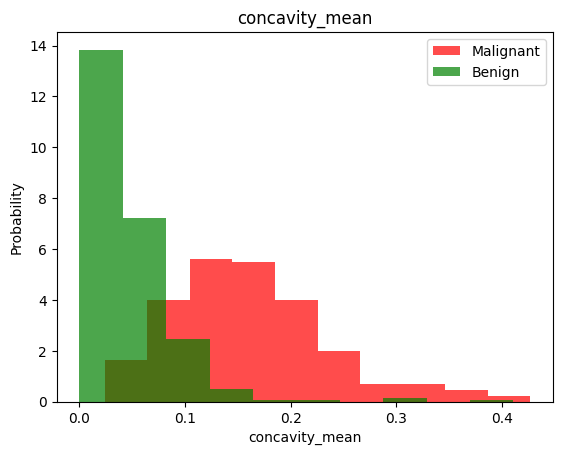

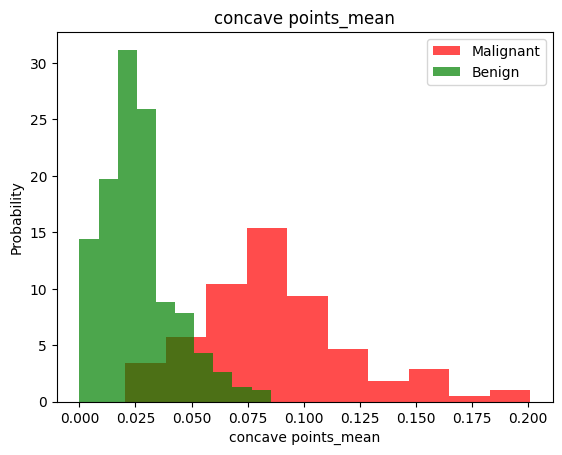

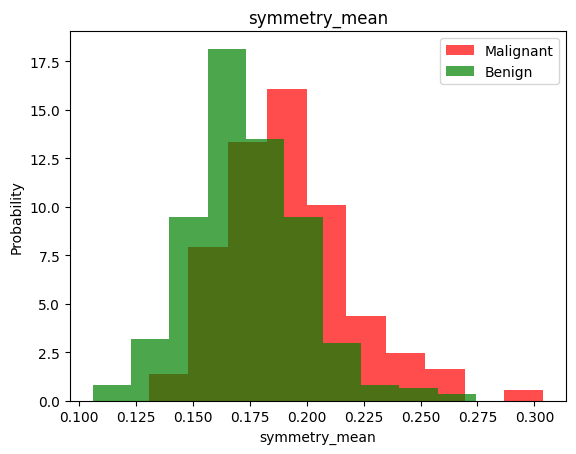

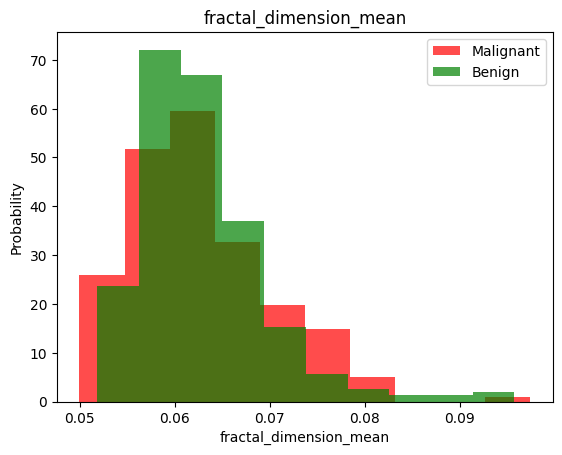

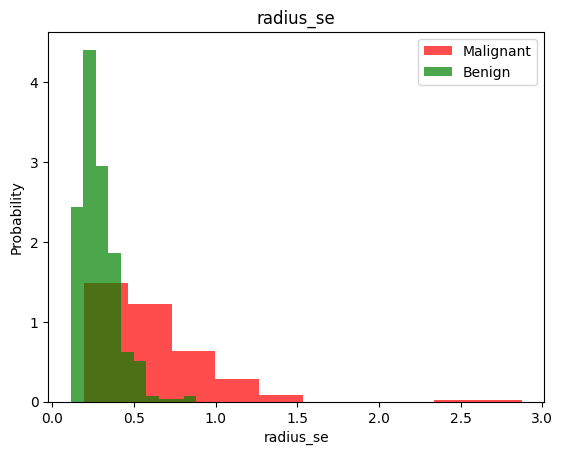

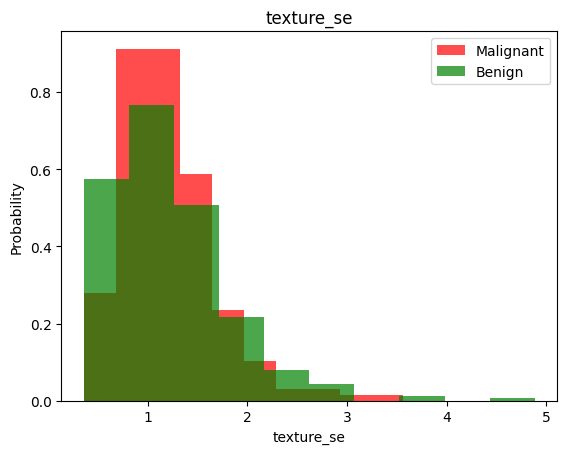

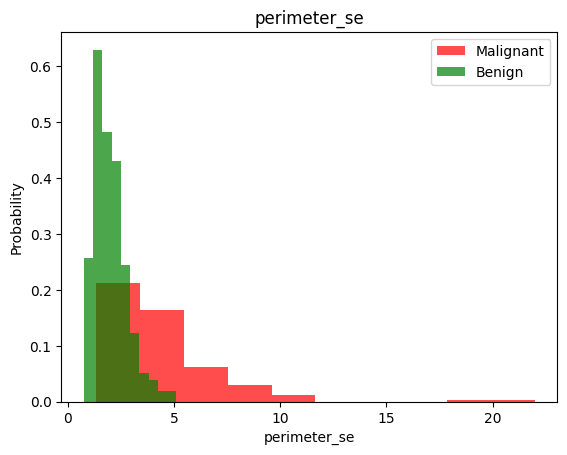

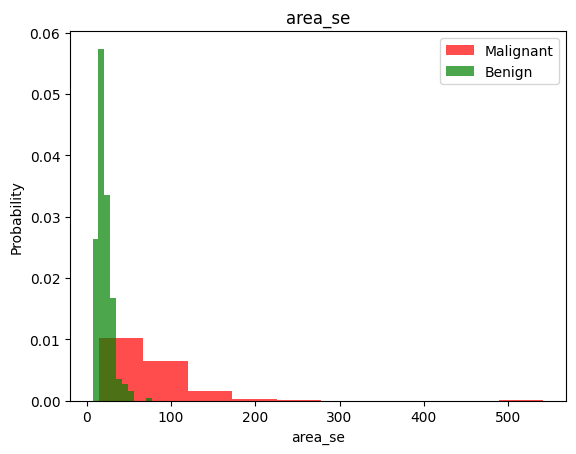

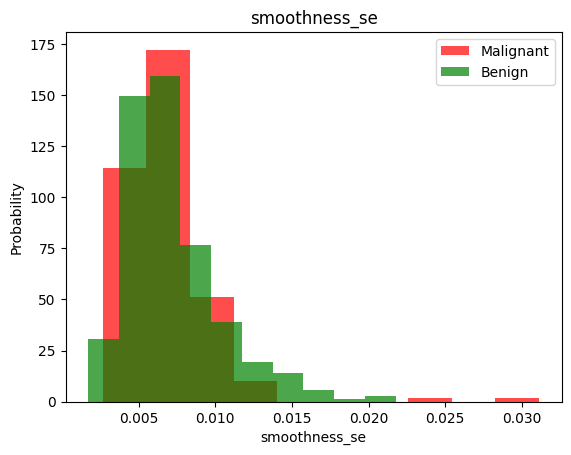

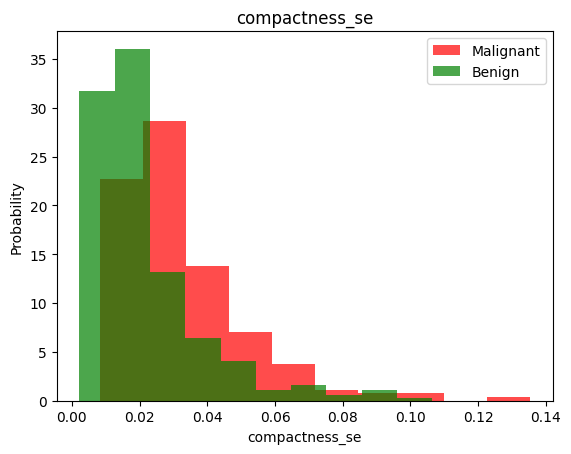

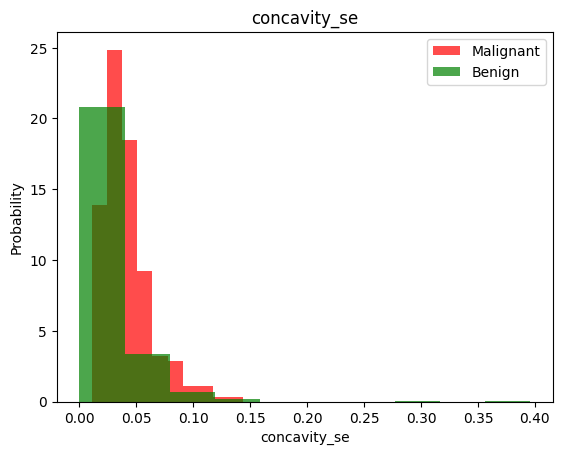

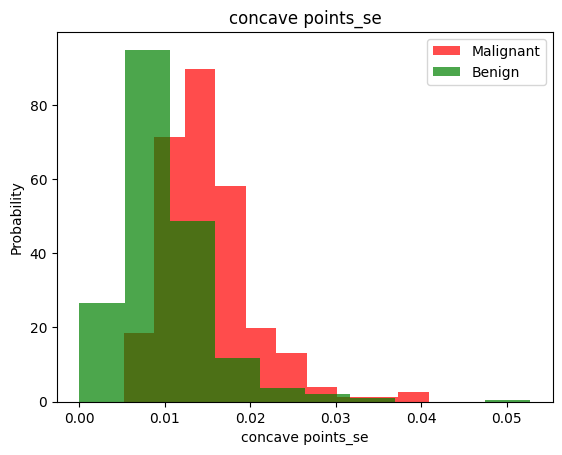

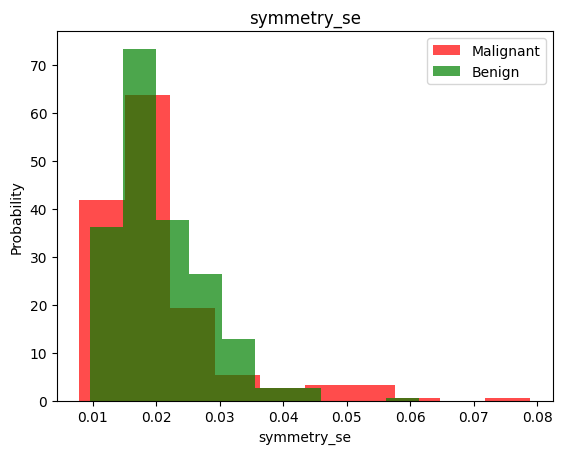

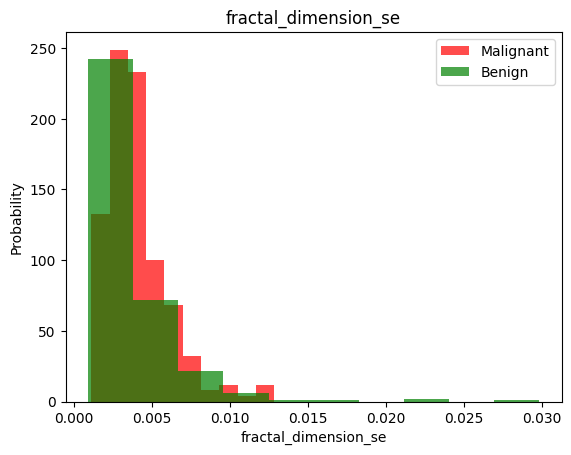

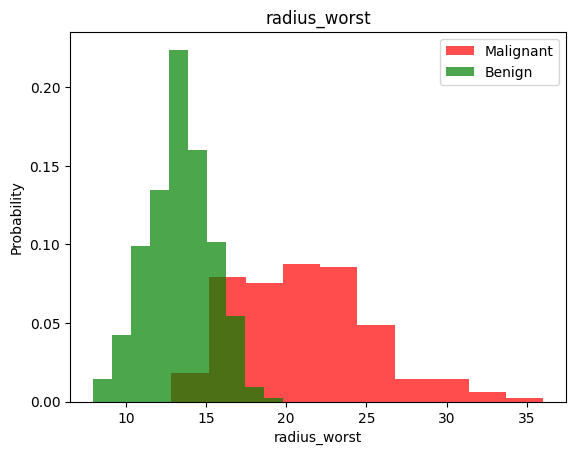

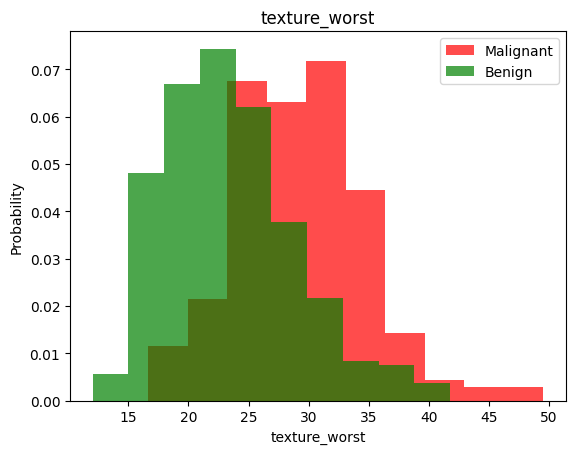

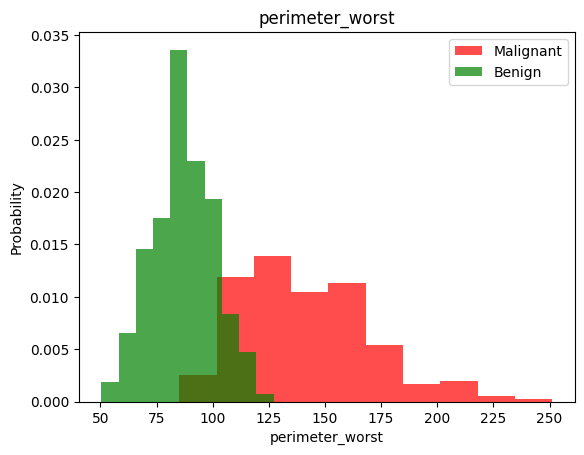

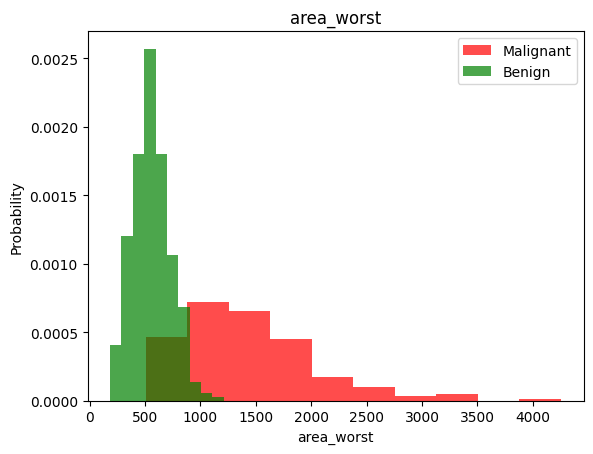

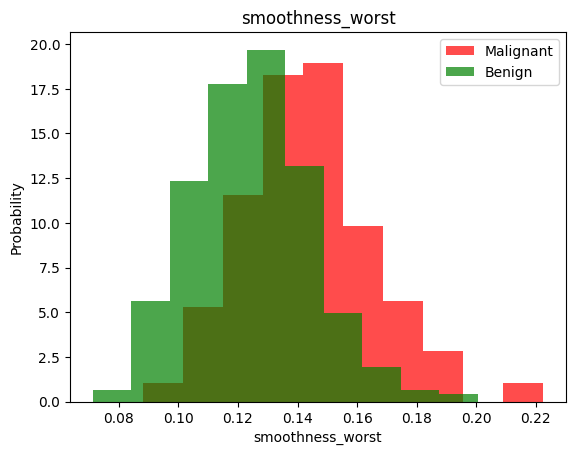

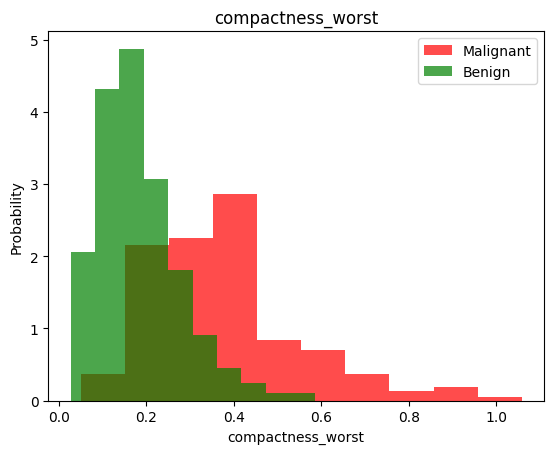

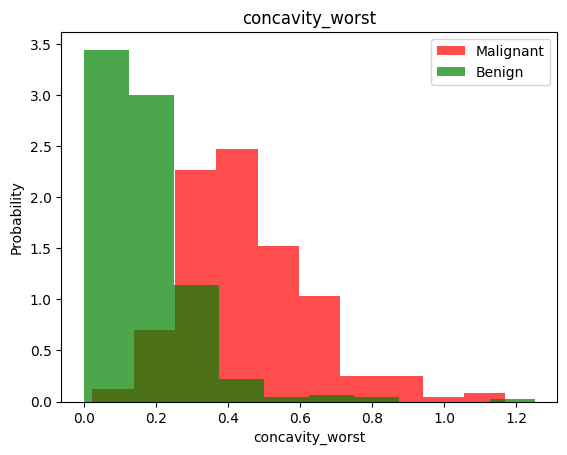

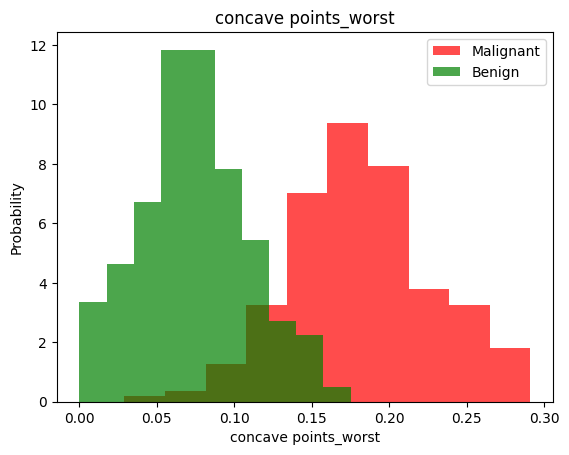

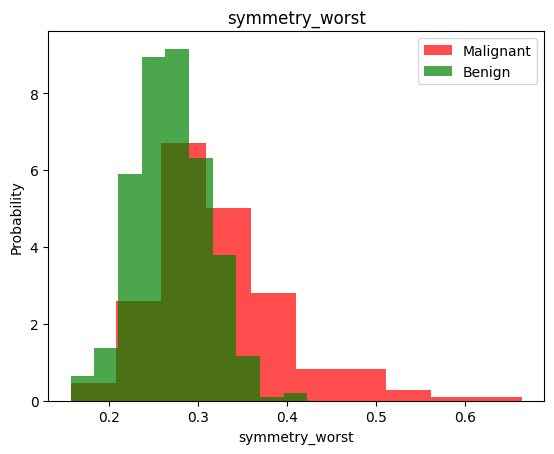

In [54]:
for label in cols[1:-1]:
  plt.hist(df[df["diagnosis"]==1][label], color='red', label='Malignant', alpha=0.7, density=True)
  plt.hist(df[df["diagnosis"]==0][label], color='green', label='Benign', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Prepare data: training, validation, test

In [140]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # 'frac' parameter specifies the fraction of rows to return -- it should be between 0 and 1

In [121]:
def scale_dataset(dataframe, do_scale=False, over_sample=False):
  X = dataframe[dataframe.columns[2:]].values
  y = dataframe[dataframe.columns[1]].values

  # Think about what data this should be used on: training, validation, test.
  if do_scale:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

  if over_sample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [141]:
train, X_train, y_train = scale_dataset(train, do_scale=True, over_sample=True) # For this data-set, over-sampling produces slightly-better results.
valid, X_valid, y_valid = scale_dataset(valid, do_scale=True,over_sample=False)
test, X_test, y_test = scale_dataset(test, do_scale=True,over_sample=False)

#kNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [143]:
y_pred = knn_model.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred)) # precision = # true positives out of # all labelled positves. recall = # predicted correctly out of # all true positives.

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [145]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [146]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.96      0.88      0.91        49

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



#Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [147]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)  # Issue if data not scaled.

In [148]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.92      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#SVM (Support Vector Machines) (kernal-trick, etc.)

In [38]:
from sklearn.svm import SVC

In [149]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [150]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      0.96      0.98        49

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#Neural Networks

In [45]:
import tensorflow as tf

In [46]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [151]:
def train_model(num_inputs, X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(num_inputs,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

About to train: 16 nodes, dropout 0, lr 0.01, batch size 32


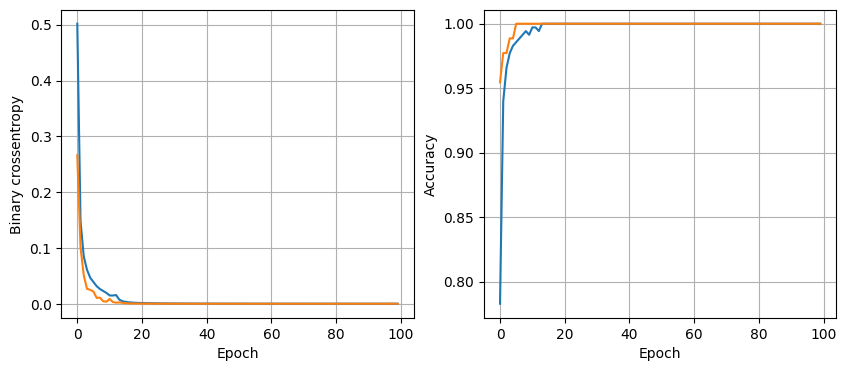

4/4 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9912
About to train: 16 nodes, dropout 0, lr 0.01, batch size 64


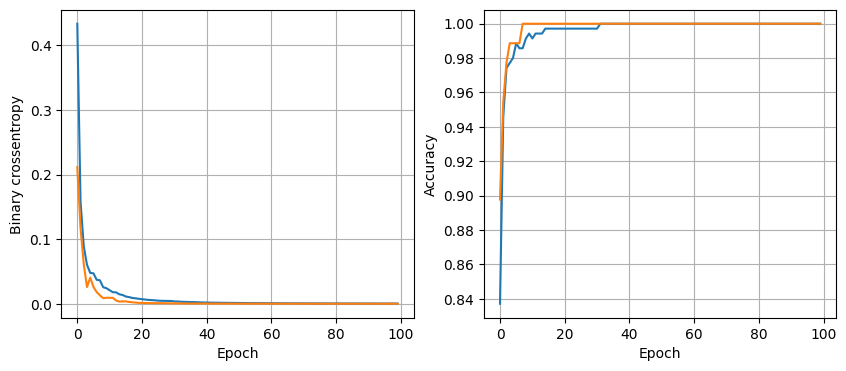

4/4 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9912
About to train: 16 nodes, dropout 0, lr 0.01, batch size 128


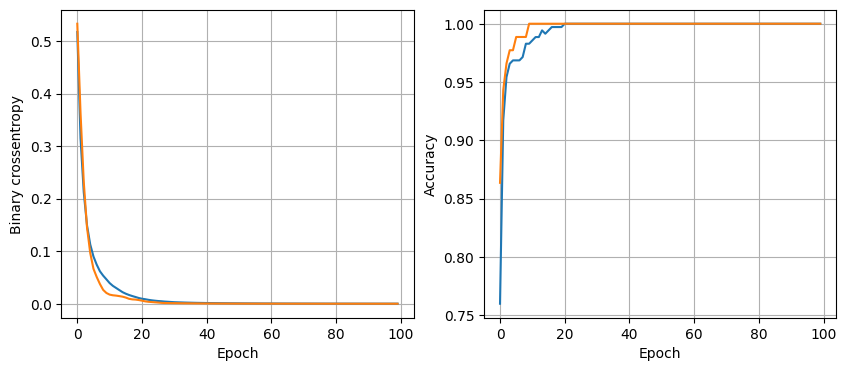

4/4 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9737
About to train: 16 nodes, dropout 0, lr 0.005, batch size 32


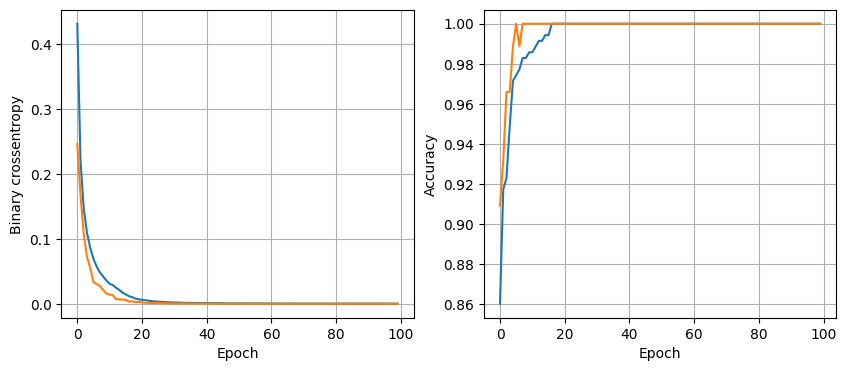

4/4 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9912
About to train: 16 nodes, dropout 0, lr 0.005, batch size 64


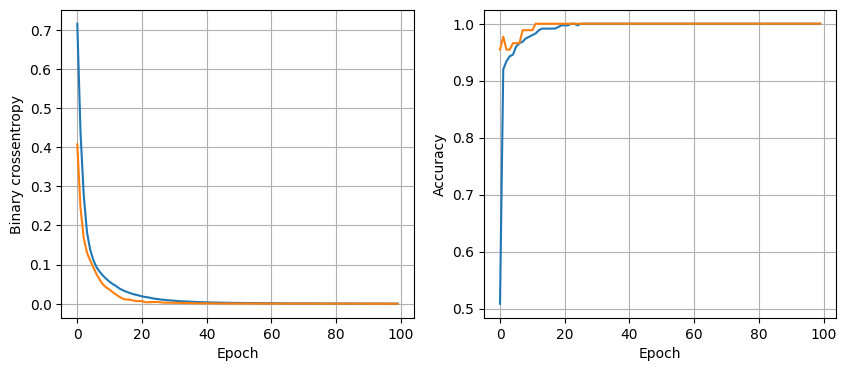

4/4 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9912
About to train: 16 nodes, dropout 0, lr 0.005, batch size 128


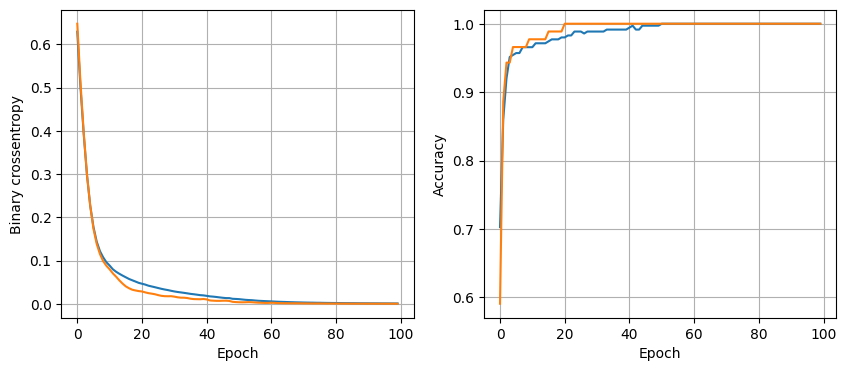

4/4 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9912
About to train: 16 nodes, dropout 0, lr 0.001, batch size 32


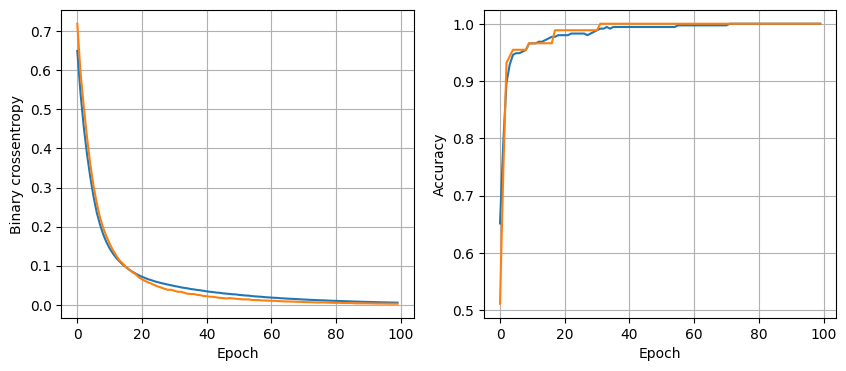

4/4 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9825
About to train: 16 nodes, dropout 0, lr 0.001, batch size 64


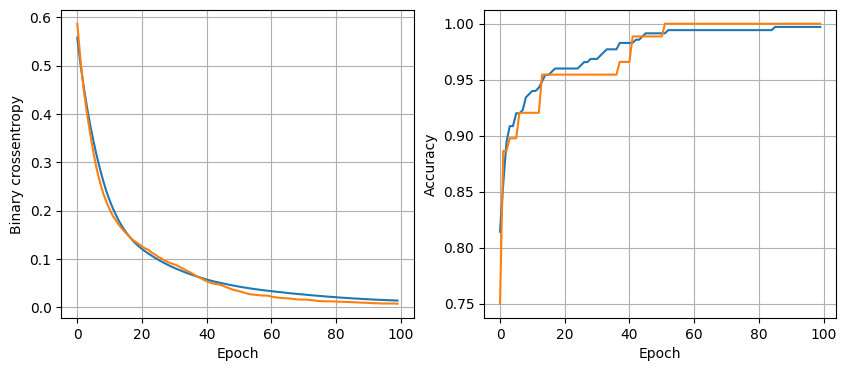

4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9825
About to train: 16 nodes, dropout 0, lr 0.001, batch size 128


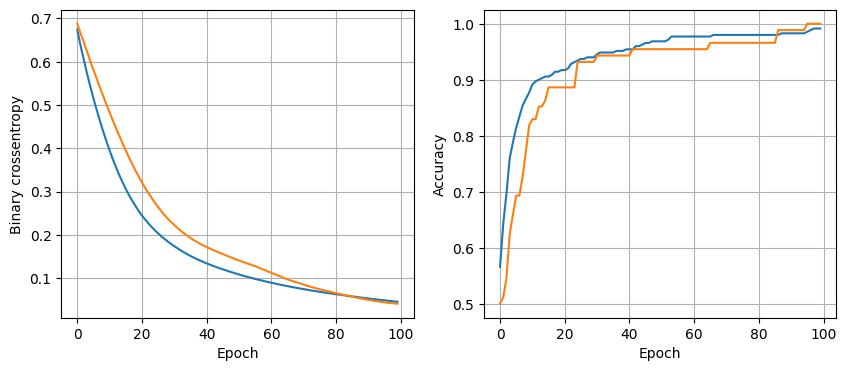

4/4 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9825
About to train: 16 nodes, dropout 0.2, lr 0.01, batch size 32


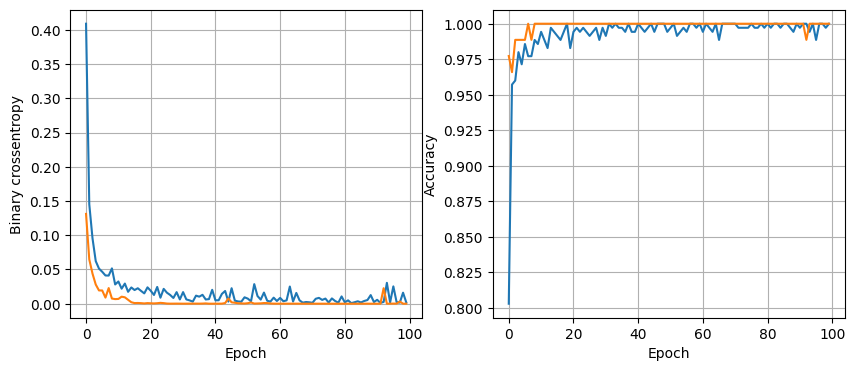

4/4 [==============================] - 0s 5ms/step - loss: 0.0680 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.01, batch size 64


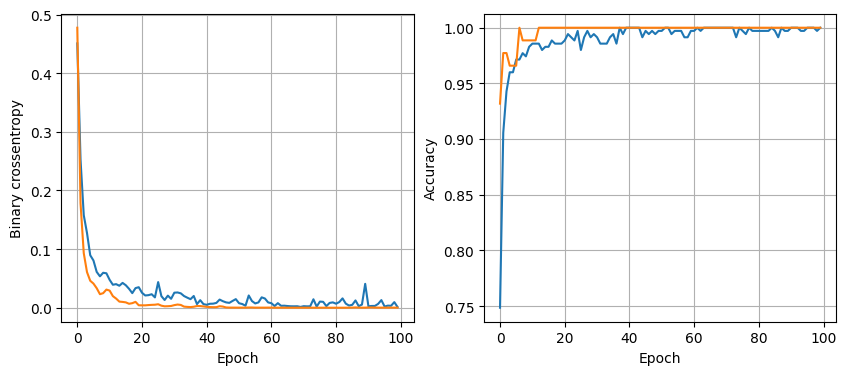

4/4 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.01, batch size 128


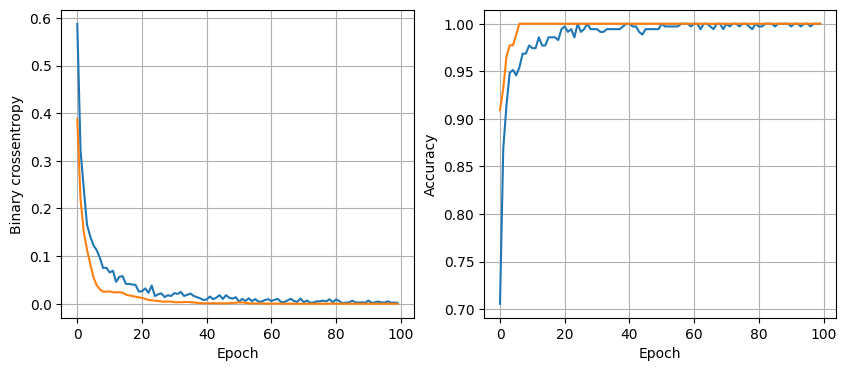

4/4 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.005, batch size 32


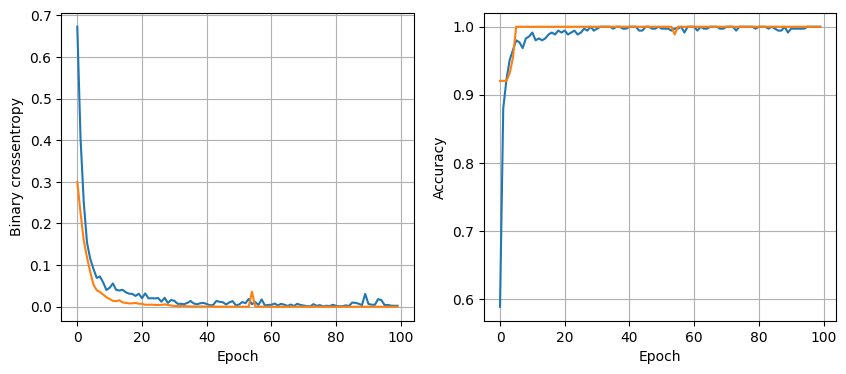

4/4 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.005, batch size 64


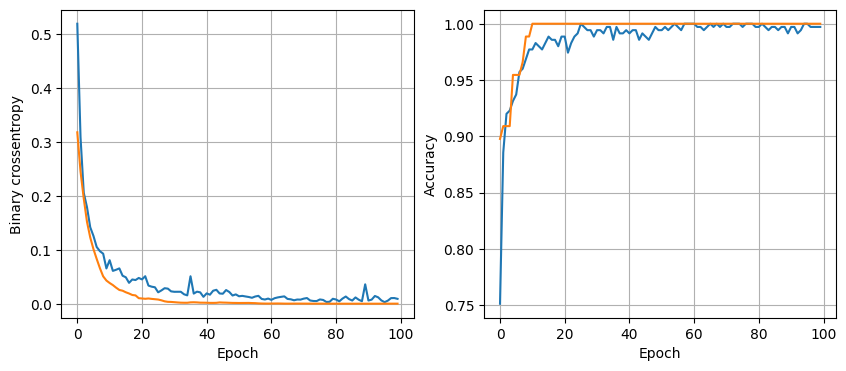

4/4 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.005, batch size 128


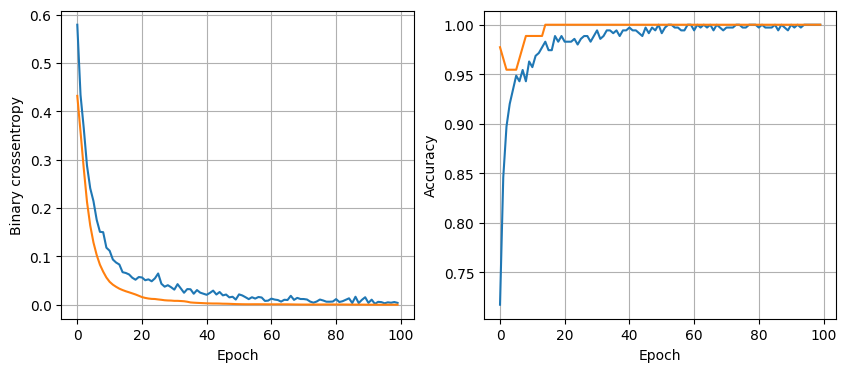

4/4 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.001, batch size 32


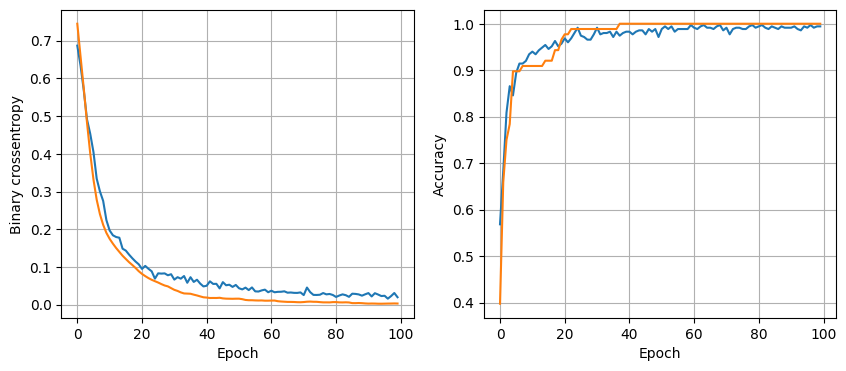

4/4 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.001, batch size 64


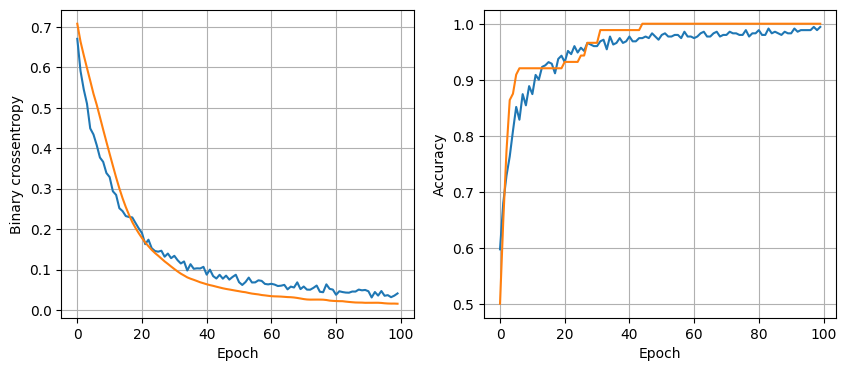

4/4 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9912
About to train: 16 nodes, dropout 0.2, lr 0.001, batch size 128


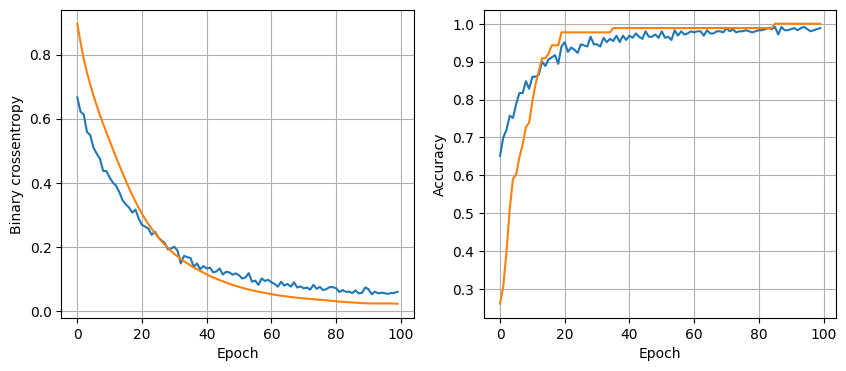

4/4 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 1.0000
About to train: 32 nodes, dropout 0, lr 0.01, batch size 32


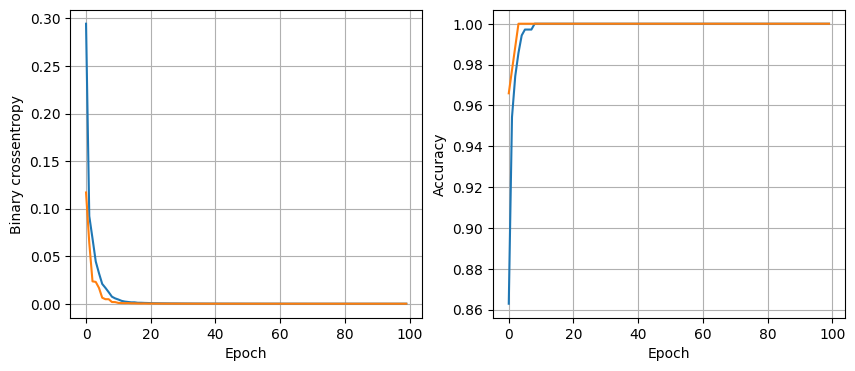

4/4 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.01, batch size 64


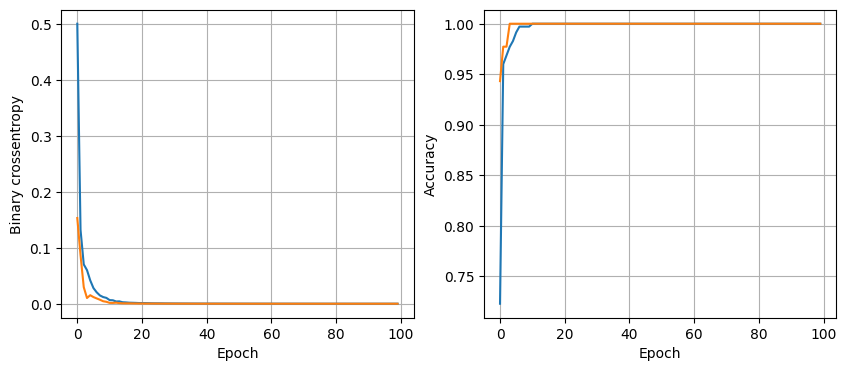

4/4 [==============================] - 0s 5ms/step - loss: 0.0780 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.01, batch size 128


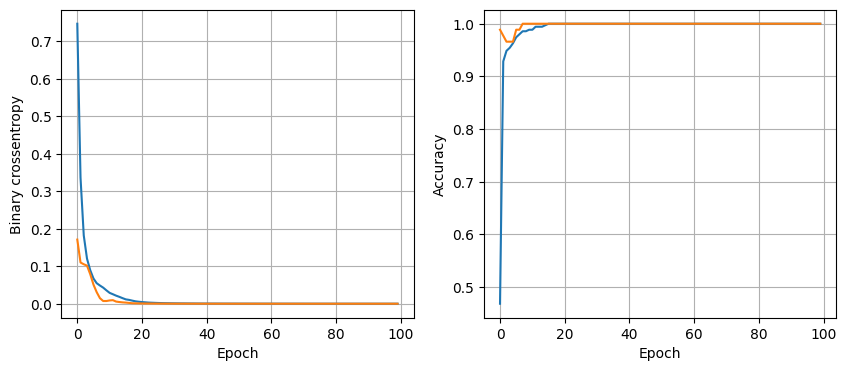

4/4 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.005, batch size 32


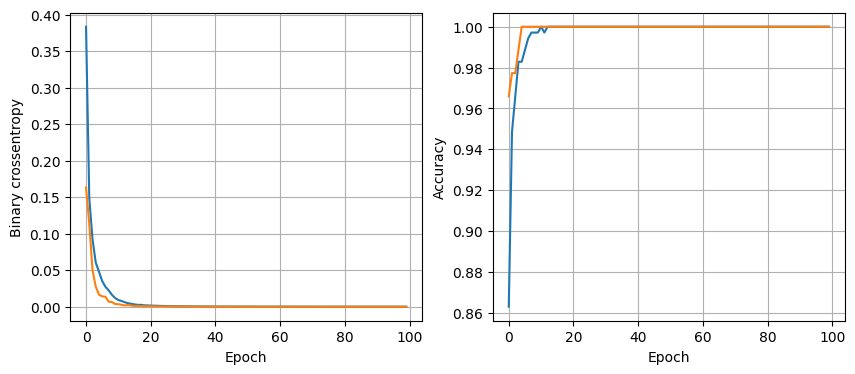

4/4 [==============================] - 0s 6ms/step - loss: 0.0414 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.005, batch size 64


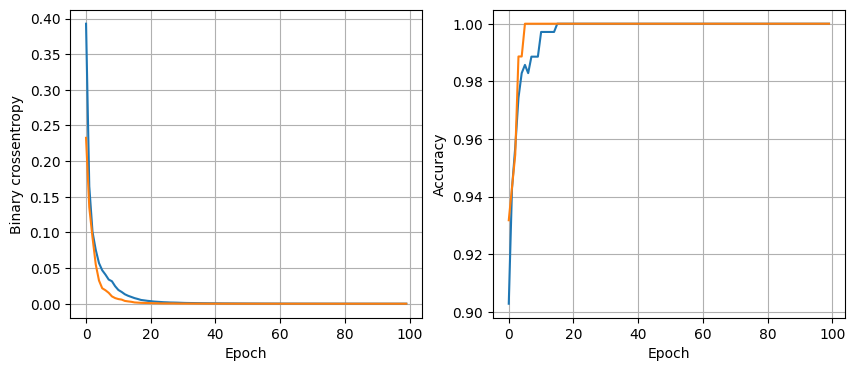

4/4 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.005, batch size 128


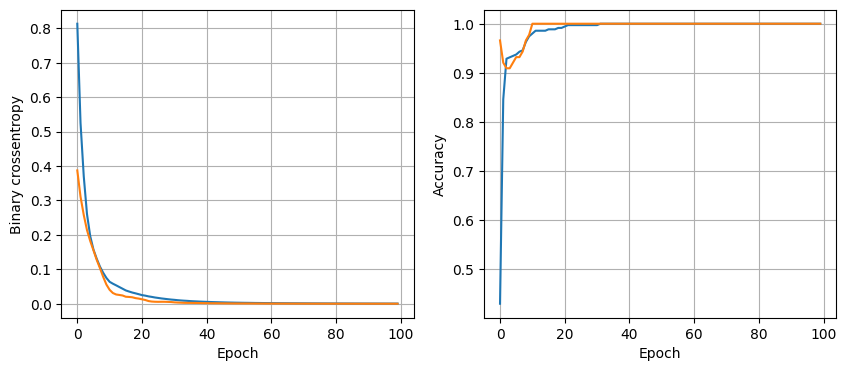

4/4 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.001, batch size 32


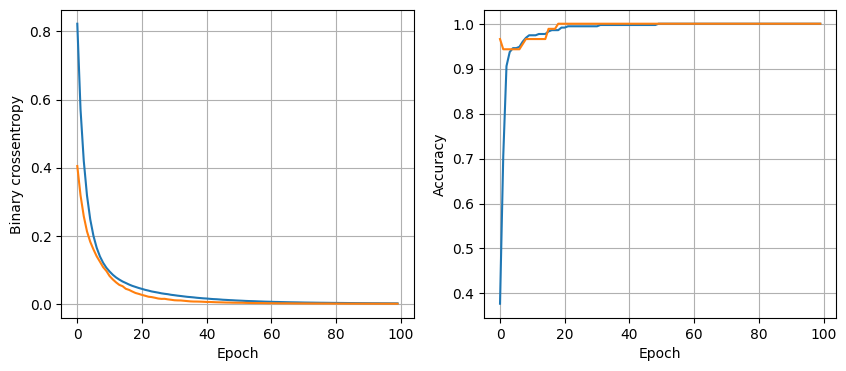

4/4 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.001, batch size 64


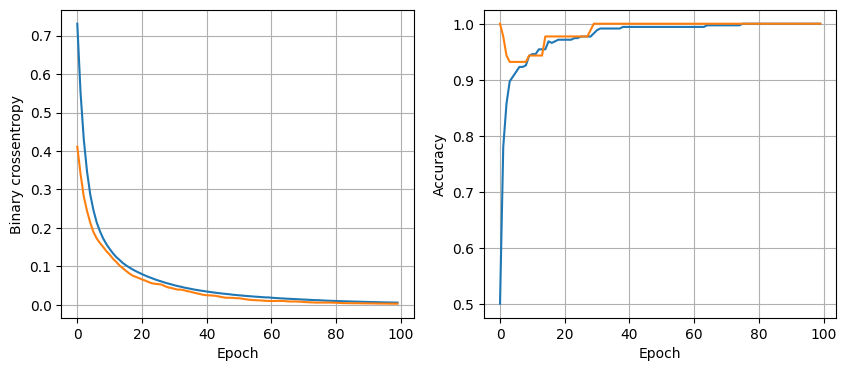

4/4 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9912
About to train: 32 nodes, dropout 0, lr 0.001, batch size 128


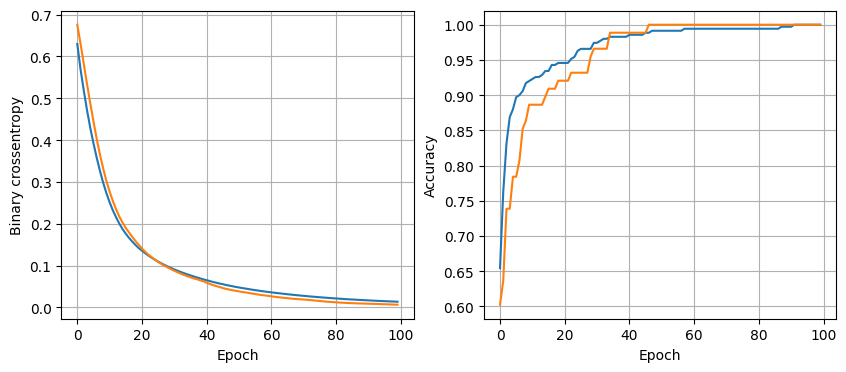

4/4 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.01, batch size 32


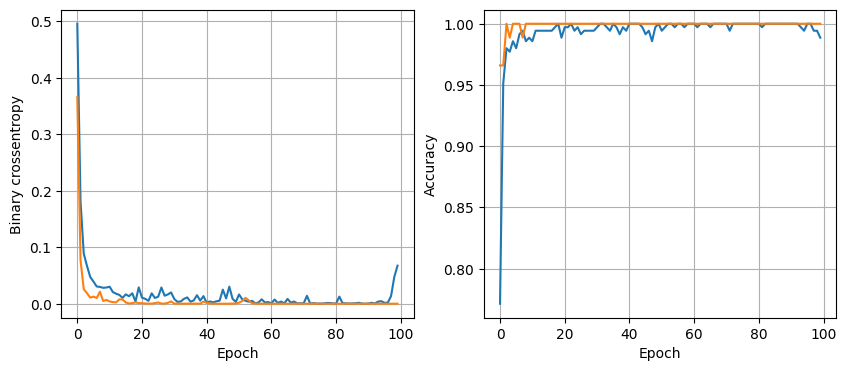

4/4 [==============================] - 0s 7ms/step - loss: 0.0557 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.01, batch size 64


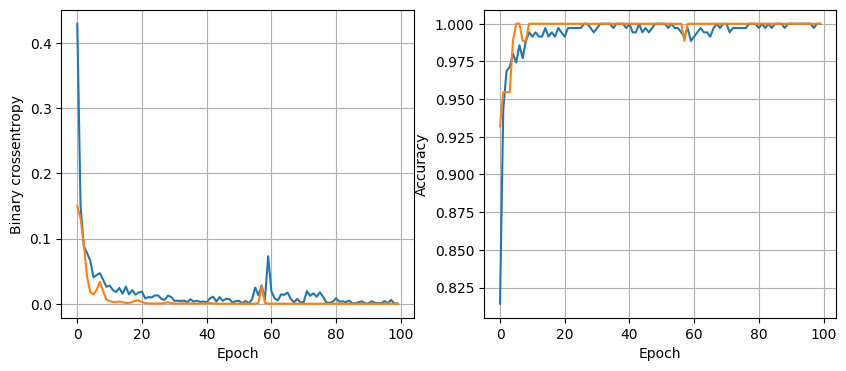

4/4 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.01, batch size 128


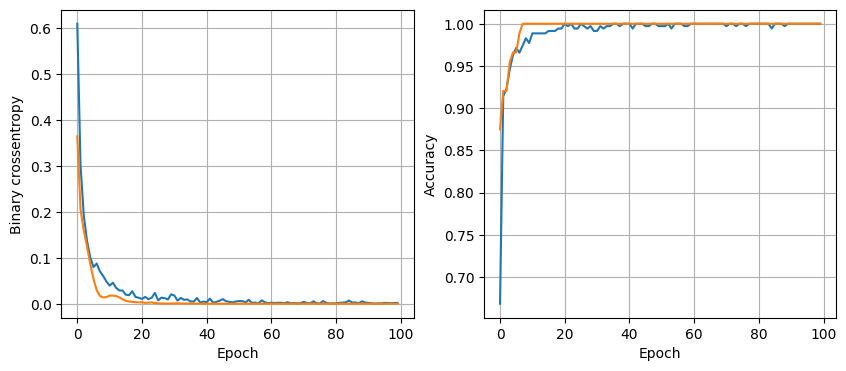

4/4 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.005, batch size 32


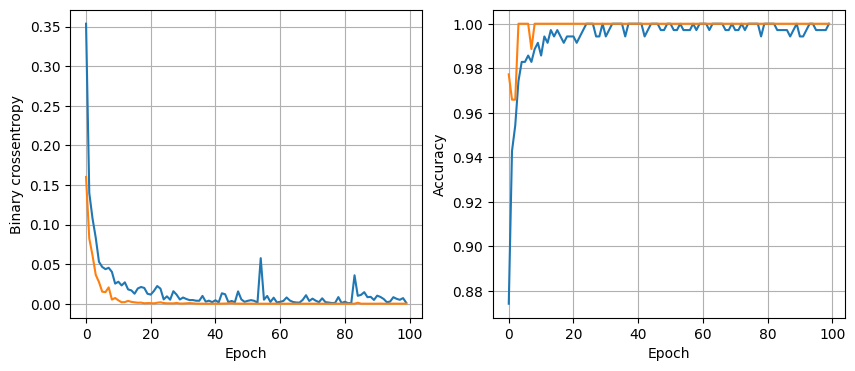

4/4 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.005, batch size 64


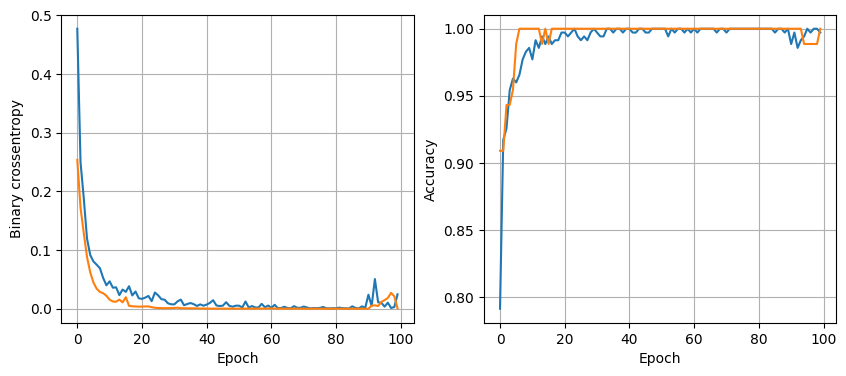

4/4 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.005, batch size 128


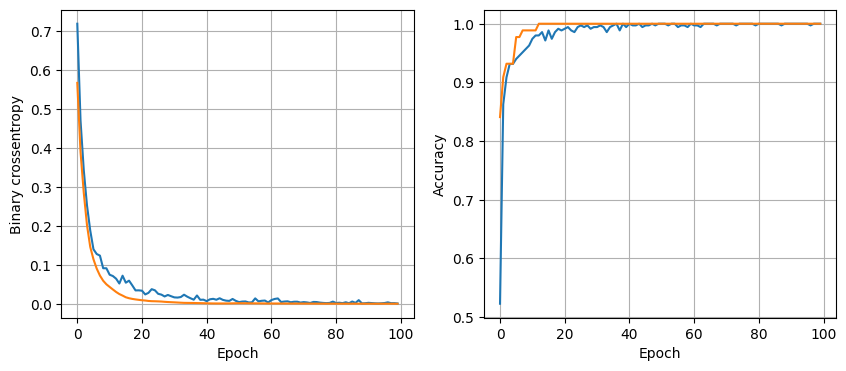

4/4 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.001, batch size 32


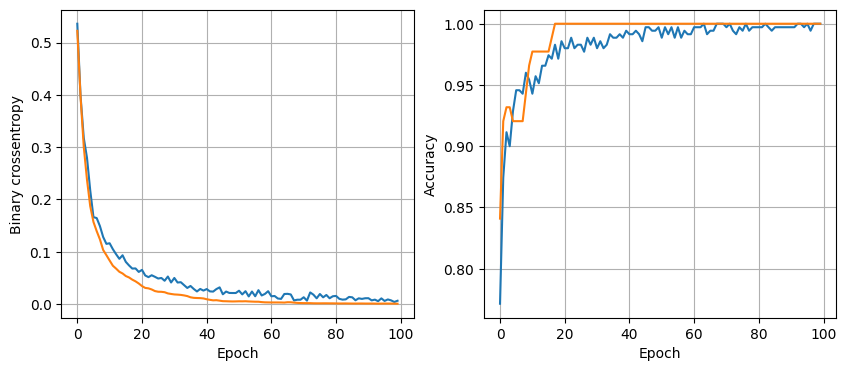

4/4 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.001, batch size 64


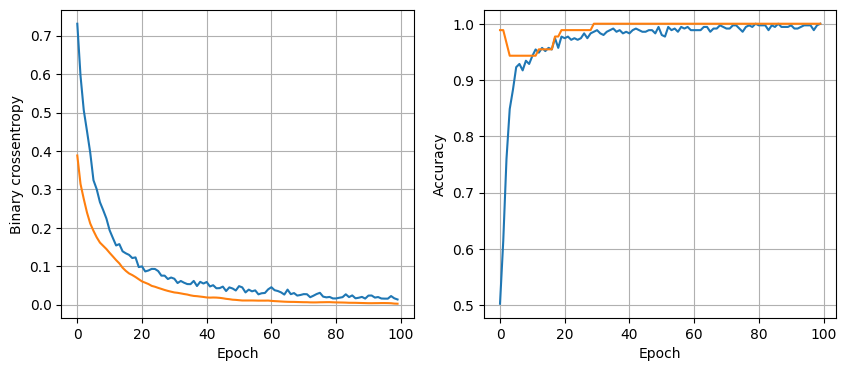

4/4 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9912
About to train: 32 nodes, dropout 0.2, lr 0.001, batch size 128


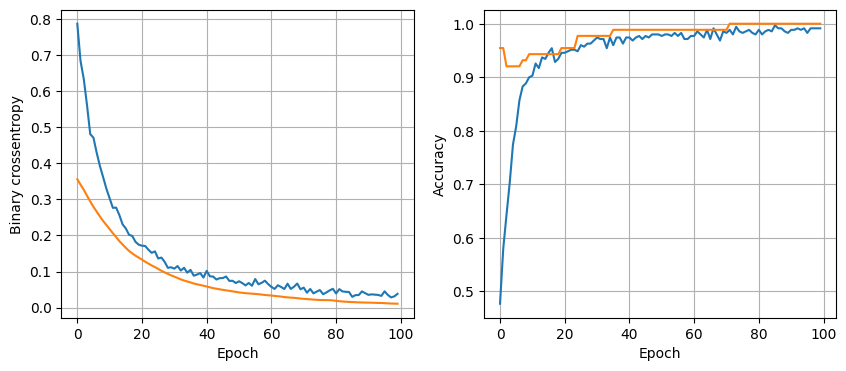

4/4 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.01, batch size 32


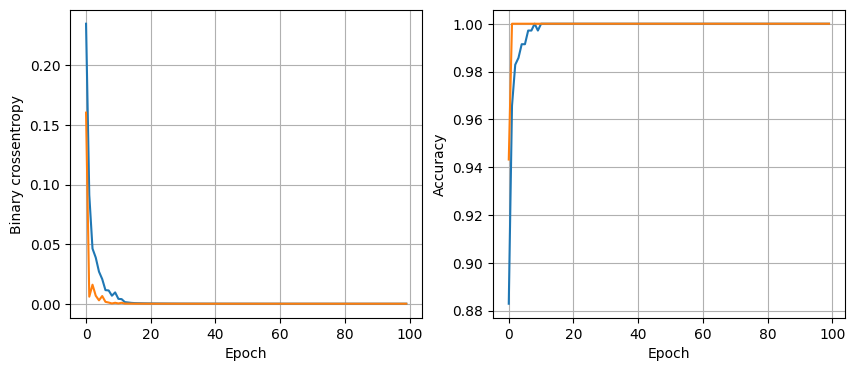

4/4 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.01, batch size 64


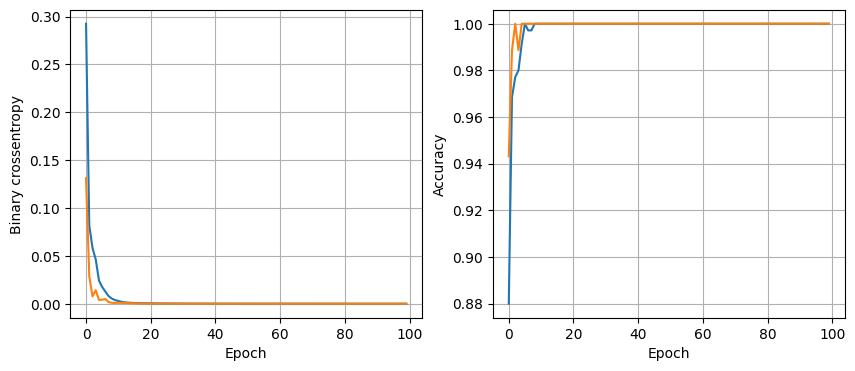

4/4 [==============================] - 0s 4ms/step - loss: 0.0425 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.01, batch size 128


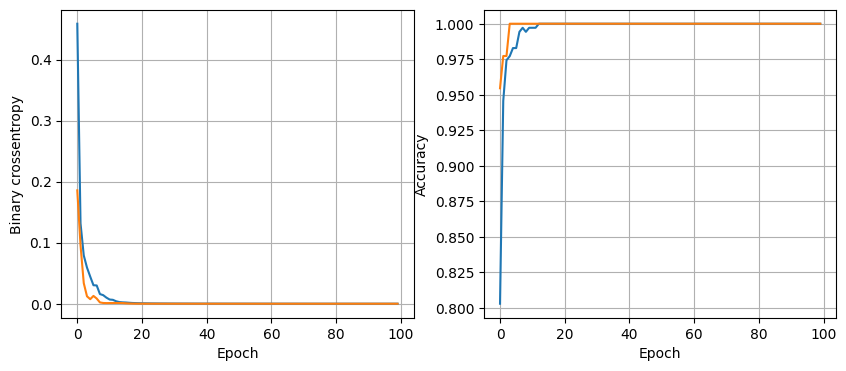

4/4 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.005, batch size 32


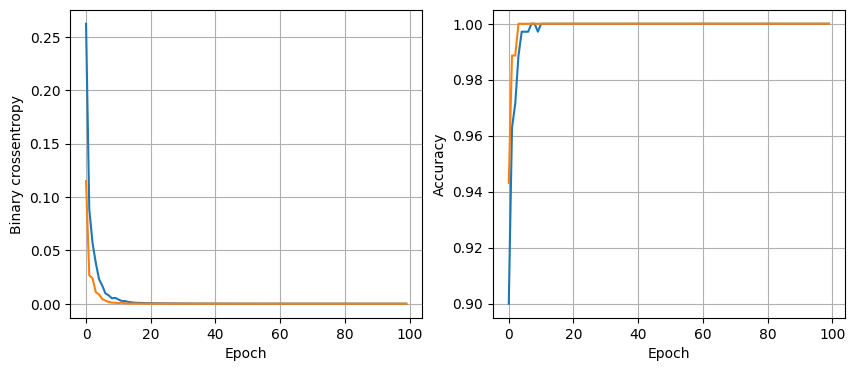

4/4 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.005, batch size 64


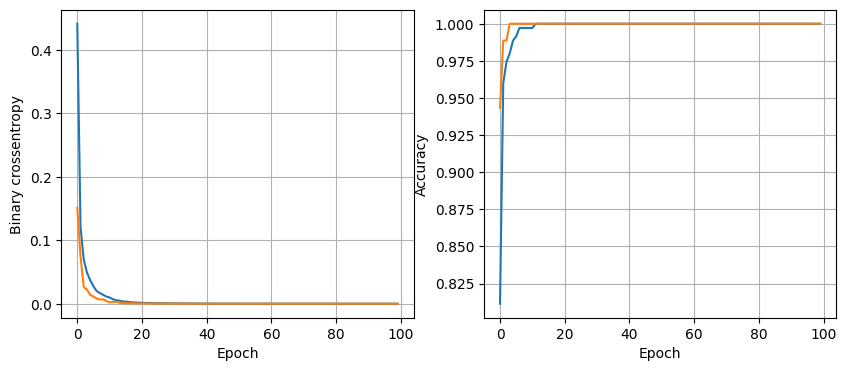

4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.005, batch size 128


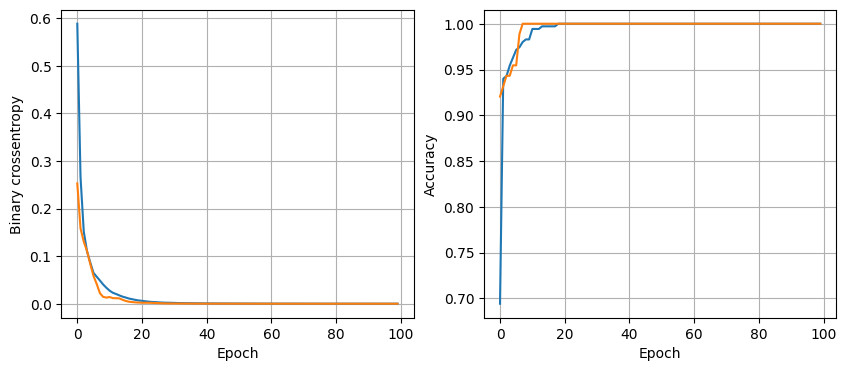

4/4 [==============================] - 0s 9ms/step - loss: 0.0520 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.001, batch size 32


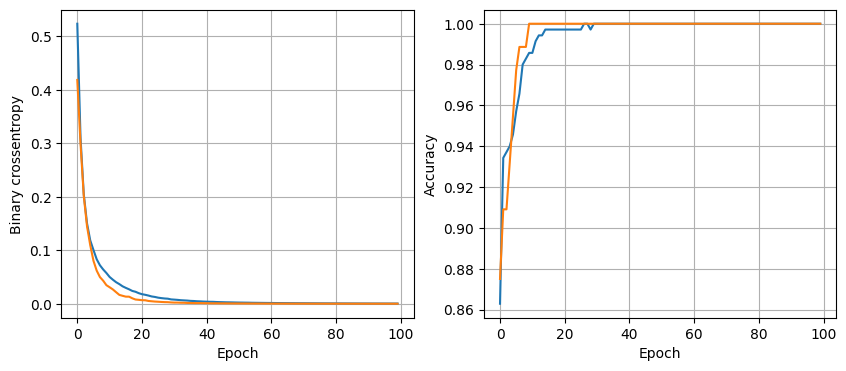

4/4 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.001, batch size 64


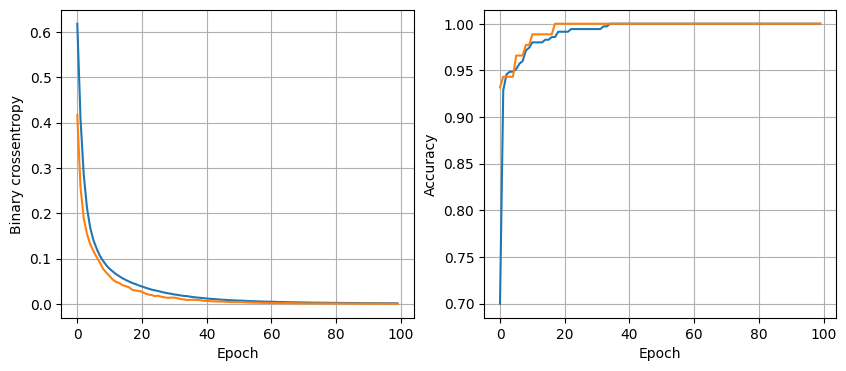

4/4 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9912
About to train: 64 nodes, dropout 0, lr 0.001, batch size 128


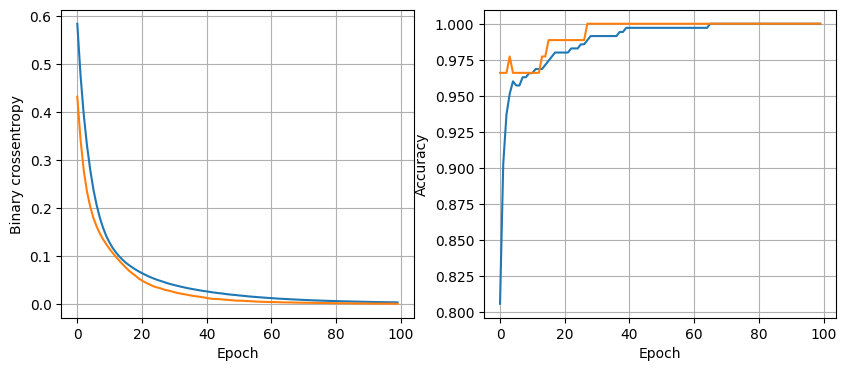

4/4 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.01, batch size 32


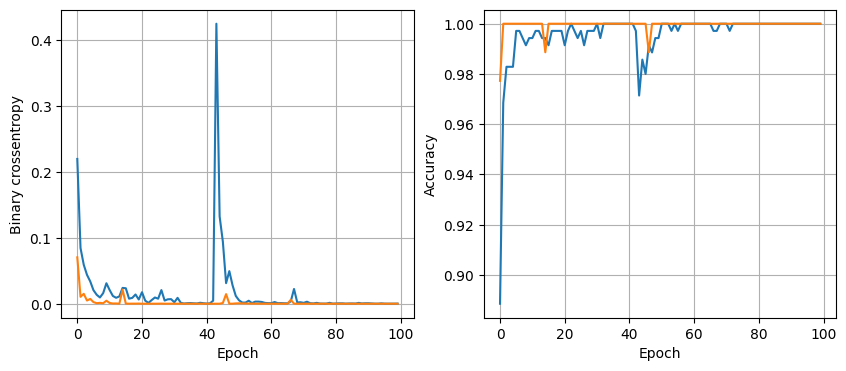

4/4 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.01, batch size 64


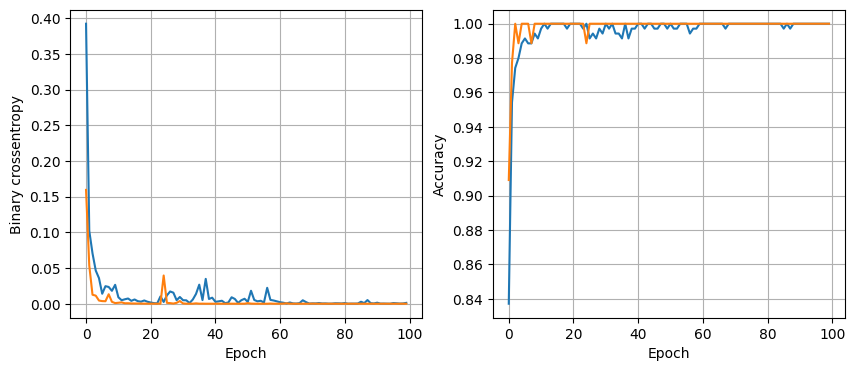

4/4 [==============================] - 0s 7ms/step - loss: 0.0538 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.01, batch size 128


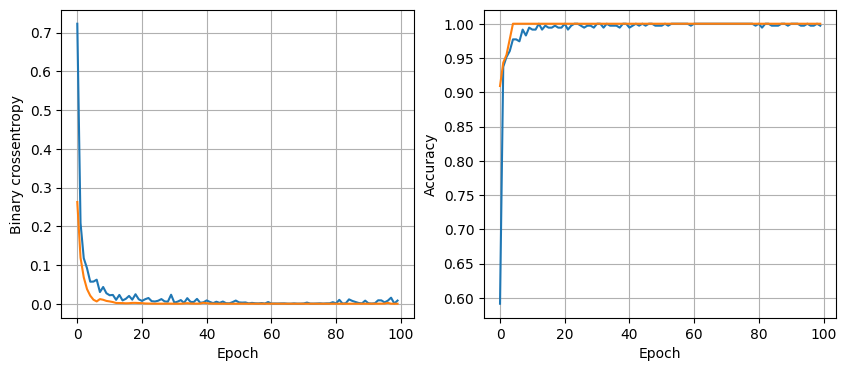

4/4 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.005, batch size 32


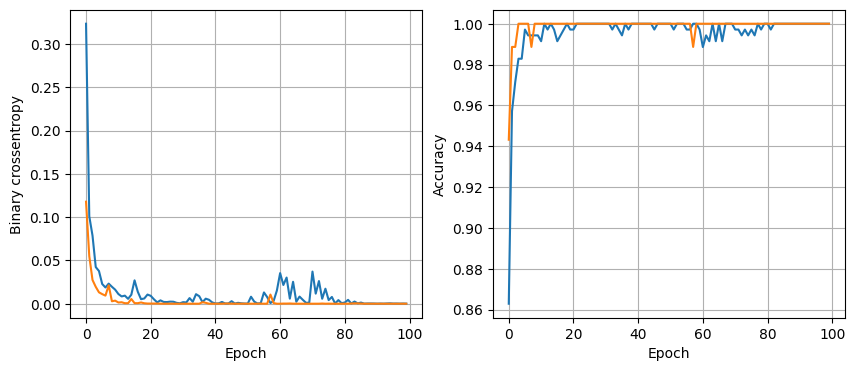

4/4 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.005, batch size 64


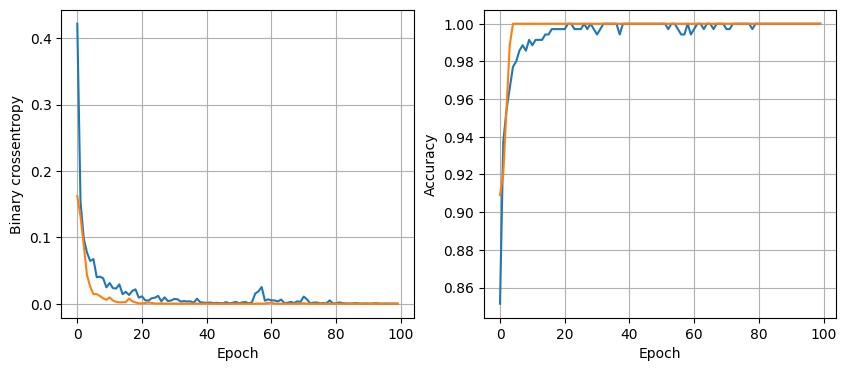

4/4 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.005, batch size 128


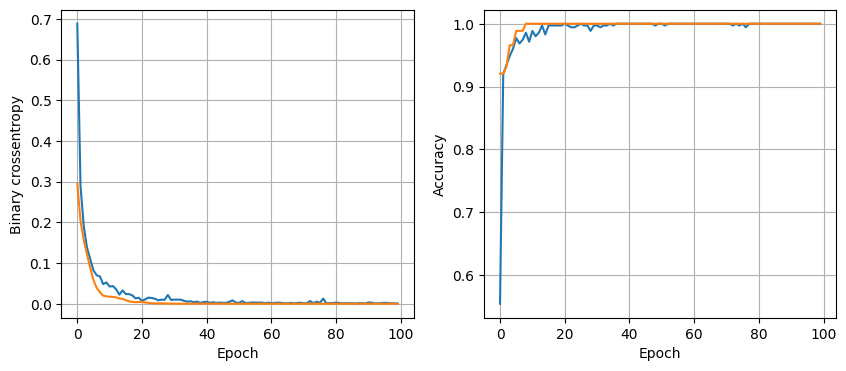

4/4 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.001, batch size 32


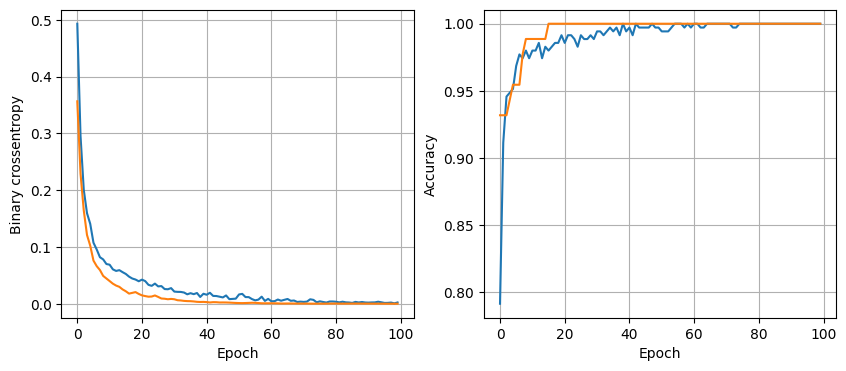

4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.001, batch size 64


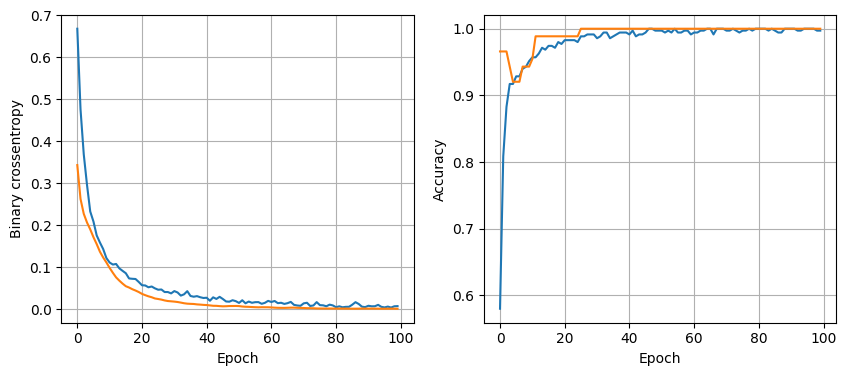

4/4 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9912
About to train: 64 nodes, dropout 0.2, lr 0.001, batch size 128


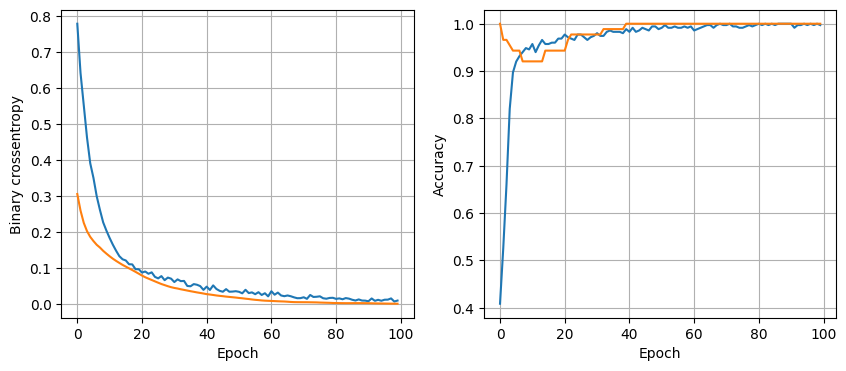

4/4 [==============================] - 0s 6ms/step - loss: 0.0301 - accuracy: 0.9912


In [152]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"About to train: {num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(30, X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [153]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

4/4 [==============================] - 1s 4ms/step


In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

